We'll first load the `pandas` library and set some useful variables we'll use for preprocessing, such as column names and target labels. After that, we'll peek at the data and see what it's made of.

In [27]:
import pandas as pd
headers = ["parents", "has_nurs", "form", "children", "housing", "finance", "social", "health", "target"]
target_names = ["not_recom", "recommend", "very_recom", "priority", "spec_prior"]
features = headers[:-1]
label = headers[-1]

df = pd.read_csv("nursery.csv", names=headers)
display(df)

,parents,has_nurs,form,children,housing,finance,social,health,target
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
5,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom
6,usual,proper,complete,1,convenient,convenient,problematic,recommended,priority
7,usual,proper,complete,1,convenient,convenient,problematic,priority,priority
8,usual,proper,complete,1,convenient,convenient,problematic,not_recom,not_recom
9,usual,proper,complete,1,convenient,inconv,nonprob,recommended,very_recom


We see all features are categorical, except maybe the `children` feature. To inspect this further, we'll check the `dtypes` attribute of the data frame.

In [2]:
df.dtypes

parents     object
has_nurs    object
form        object
children    object
housing     object
finance     object
social      object
health      object
target      object
dtype: object

We see `pandas` has inferred the `object` type for each one of our attributes. Let's dig in and see which kind of values our features can take on. To do this, we'll make use of the `unique` method of the data frame.

In [3]:
[(h, df[h].unique()) for h in headers]

[('parents', array(['usual', 'pretentious', 'great_pret'], dtype=object)),
 ('has_nurs',
  array(['proper', 'less_proper', 'improper', 'critical', 'very_crit'],
        dtype=object)),
 ('form',
  array(['complete', 'completed', 'incomplete', 'foster'], dtype=object)),
 ('children', array(['1', '2', '3', 'more'], dtype=object)),
 ('housing', array(['convenient', 'less_conv', 'critical'], dtype=object)),
 ('finance', array(['convenient', 'inconv'], dtype=object)),
 ('social', array(['nonprob', 'slightly_prob', 'problematic'], dtype=object)),
 ('health', array(['recommended', 'priority', 'not_recom'], dtype=object)),
 ('target',
  array(['recommend', 'priority', 'not_recom', 'very_recom', 'spec_prior'],
        dtype=object))]

We now see that even `children` is a categorical feature. Let's move on and convert each feature into a categorical one, so that `pandas` can treat them properly. We won't loop on each column, but set up each category at a time. Why is that? You should have noted that each category is ordered (as an example, take a look at the values of the `housing` feature. You can clearly see that `convenient` is better than `less_conv`, which in turn is better than `critical`). However, we do understand how values are ordered because we know the meaning of each word, but the computer does not. Hence, we'll need to manually specify the order of each category.

As a note, that was not really the case for this dataset, in which all the rows were given ordered by categories. In general, though, you will find this preprocessing step useful, as real data almost never comes in ordered form.

In [4]:
df.parents = df.parents.astype("category", categories=["usual", "pretentious", "great_pret"], ordered=True)
df.has_nurs = df.has_nurs.astype("category", categories=["proper", "less_proper", "improper", "critical", "very_crit"], ordered=True)
df.form = df.form.astype("category", categories=["complete", "completed", "incomplete", "foster"], ordered=True)
df.children = df.children.astype("category", categories=["1", "2", "3", "more"], ordered=True)
df.housing = df.housing.astype("category", categories=["convenient", "less_conv", "critical"], ordered=True)
df.finance = df.finance.astype("category", categories=["convenient", "inconv"], ordered=True)
df.social = df.social.astype("category", categories=["nonprob", "slightly_prob", "problematic"], ordered=True)
df.health = df.health.astype("category", categories=["recommended", "priority", "not_recom"], ordered=True)
df.target = df.target.astype("category", categories=target_names, ordered=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 9 columns):
parents     12960 non-null category
has_nurs    12960 non-null category
form        12960 non-null category
children    12960 non-null category
housing     12960 non-null category
finance     12960 non-null category
social      12960 non-null category
health      12960 non-null category
target      12960 non-null category
dtypes: category(9)
memory usage: 115.2 KB


C:\Users\Alphonso_Jo\AppData\Local\conda\conda\envs\python2.7\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.
C:\Users\Alphonso_Jo\AppData\Local\conda\conda\envs\python2.7\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  
C:\Users\Alphonso_Jo\AppData\Local\conda\conda\envs\python2.7\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Alphonso_Jo\AppData\Local\conda\conda\envs\python2.7\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype inste

Ok, everything is set up properly. We now need to separate the actual target from our dataset into a separate file. We'll finally `pickle` each dataset (inputs and outputs) instead of using the usual `csv` format, so that we can utilize them without losing the conversion to category we just made. 

In [5]:
display(df.describe())

,parents,has_nurs,form,children,housing,finance,social,health,target
count,12960,12960,12960,12960,12960,12960,12960,12960,12960
unique,3,5,4,4,3,2,3,3,5
top,great_pret,very_crit,foster,more,critical,inconv,problematic,not_recom,not_recom
freq,4320,2592,3240,3240,4320,6480,4320,4320,4320


In [6]:
# we save a copy of all the data together; this will be useful once we perform data exploration
import pickle
df.to_pickle("newdata.pkl")
# now we separate the targets from the dataset and save inputs and targets separately; 
# this will be useful for the modeling part
targets = df[label]
inputs = df.drop(label, axis=1)
inputs.to_pickle("inputs.pkl")
targets.to_pickle("targets.pkl")

To check that we did everything correctly, let's load our input file again and see if our inputs are now represented by `pandas` as categories.

In [7]:
inputs = pd.read_pickle("inputs.pkl")
inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 8 columns):
parents     12960 non-null category
has_nurs    12960 non-null category
form        12960 non-null category
children    12960 non-null category
housing     12960 non-null category
finance     12960 non-null category
social      12960 non-null category
health      12960 non-null category
dtypes: category(8)
memory usage: 101.5 KB


Nice! We are now ready to explore our dataset and see if there are useful relationships in the data that we can exploit.

# Data Exploration

We'll perform some data exploration of our dataset. Since all our variables are categorical, we'll need the proper tools for the analysis. We hence are going to use bar plots (from the seaborn library). First, we need to load the dataset.

In [8]:
%matplotlib inline

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(style="ticks", color_codes=True)

df = pd.read_pickle("newdata.pkl")
display(df)


,parents,has_nurs,form,children,housing,finance,social,health,target
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
5,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom
6,usual,proper,complete,1,convenient,convenient,problematic,recommended,priority
7,usual,proper,complete,1,convenient,convenient,problematic,priority,priority
8,usual,proper,complete,1,convenient,convenient,problematic,not_recom,not_recom
9,usual,proper,complete,1,convenient,inconv,nonprob,recommended,very_recom


The `seaborn` library is great for working with `pandas` data frames. Let's start with making a bar plot of the `parents` condition vs `has_nurs`.

[(<matplotlib.axes._subplots.AxesSubplot at 0xbaf40f0>, 'parents'),
 (<matplotlib.axes._subplots.AxesSubplot at 0xbb3d470>, 'has_nurs'),
 (<matplotlib.axes._subplots.AxesSubplot at 0xbbb7828>, 'form'),
 (<matplotlib.axes._subplots.AxesSubplot at 0xbbe8be0>, 'children'),
 (<matplotlib.axes._subplots.AxesSubplot at 0xbc61f98>, 'housing'),
 (<matplotlib.axes._subplots.AxesSubplot at 0xbce4668>, 'finance'),
 (<matplotlib.axes._subplots.AxesSubplot at 0xbd9eda0>, 'social'),
 (<matplotlib.axes._subplots.AxesSubplot at 0xbe1e550>, 'health'),
 (<matplotlib.axes._subplots.AxesSubplot at 0xbe96cc0>, 'target')]

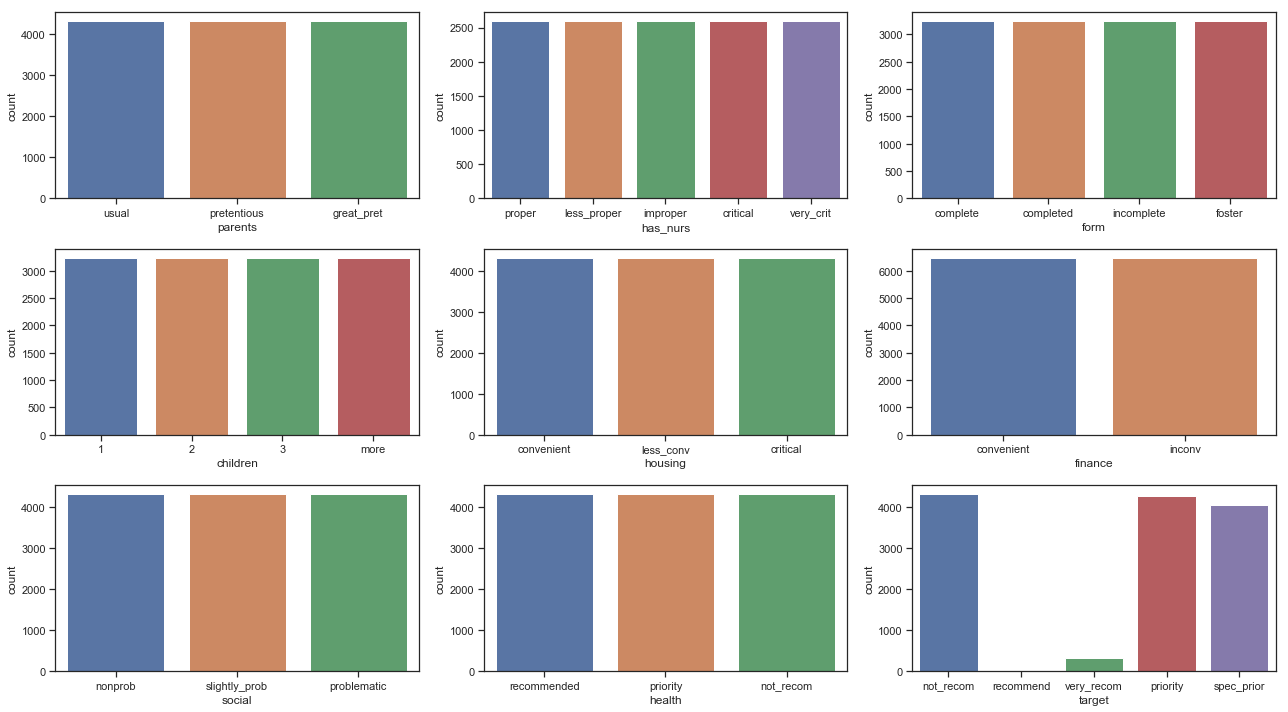

In [9]:
fig, axs = plt.subplots(nrows=3, ncols=3)
fig.set_size_inches(18, 10)

# axs is a 3x3 matrix; let's flatten it out so we can zip it with the column names
# and have a nice column-axis pair to assign on each loop iteration
axs = axs.flatten()
colnames = df.columns.tolist()

for ax, col in zip(axs, colnames):
    sns.countplot(x=col, data=df, ax=ax)
plt.tight_layout()
zip(axs,colnames)


 Each of our features is perfectly balanced with respect to the values they can take. That is not what real life datasets would look like, but oh well. We see however that the target class is interesting: almost no observations are labelled as recommended, very few are very recommended; most of them are not recommended, recommended with priority or recommended with special priority. Let's see how the target labels are distributed within the various features.

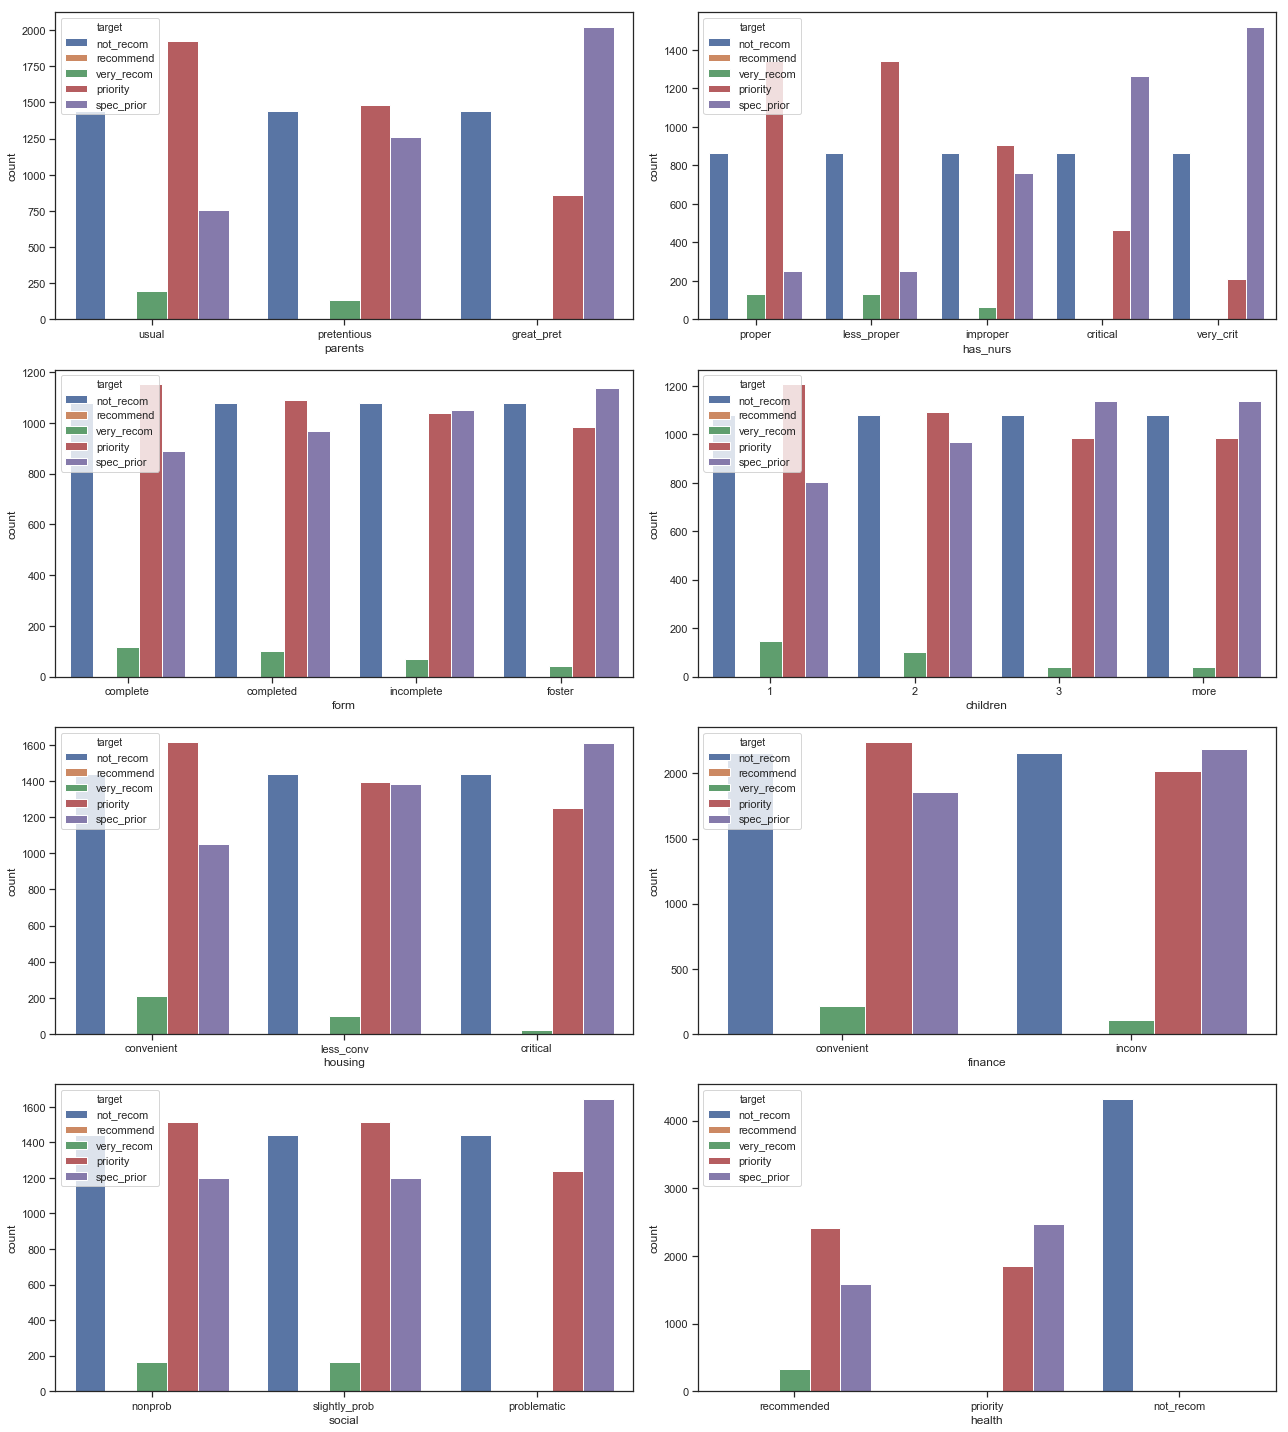

In [10]:
fig, axs = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(18, 20)

axs = axs.flatten()

for col, ax in zip(colnames, axs):
    sns.countplot(x=col, hue="target", data=df, ax=ax)
    
plt.tight_layout()



There seems to be some correlation between the family's health status and the acceptance outcome. In particular, in the last plot, we clearly see that if the health status of the family does not recommend final acceptance, the final decision will be to not recommend the child. To visualize this, and some other useful relations in the data, we will resort to use the correlation matrix between each values the features (and the target) can take. We'll display them using a heatmap to see what's going on:

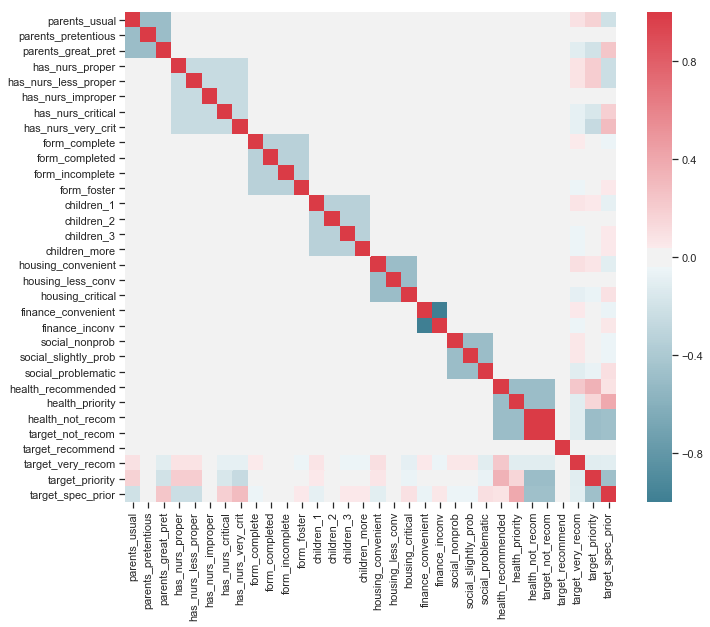

In [11]:
fig, ax = plt.subplots(figsize=(11, 9))

# the computer does not know how to calculate correlation on categories; 
# we need toone-hot encode each feature in order to get binary variables, 
# for which correlation is easy to compute
df1 = pd.get_dummies(df)

# some color palette to make the plot visually appealing...
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(df1.corr(), ax=ax, cmap=cmap)

Indeed, we found that the correlation between `target_not_recom` and `health_not_recom` is 1.0 - They're the same column! At the same time, `finance_convenient` is perfectly negatively correlated with `finance_inconv` - which means the two columns are complements.

# Modelling and Prediction using Machine Learning

The main goal of this project is to evaluate the nursery school application with the highest accuracy. In order to achieve this , we will test several test classification algorithms. Here this section includes all results obtained from study and introduces the best performer according to accuracy metric. I have chosen different algorithms for solving supervised learning throughout classification methods. 

First thing first, we are going to load our data and set a random seed for reproducibility purposes.

In [12]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
np.random.seed(1234)

inputs = pd.read_pickle("inputs.pkl")
targets = pd.read_pickle("targets.pkl")
colnames = inputs.columns.tolist()

Now we have to deal with the fact that most `scikit-learn` models don't cope well with categorical data. So we'll transform in numerical form. Notice that it suffices to transform categories into integers in this case, because categories are ordered. If they weren't, one should use a other kinds of encoding that do not take into account ordering.

In [13]:
# we convert categorical inputs to numerical form. Unfortunately, scikit-learn does not have
# a preprocessor that encodes a whole dataset at once, so we'll proceed column by column.
encs = []
for col in colnames:
    encs.append(LabelEncoder().fit(inputs.loc[:,col]))
  
for col, enc in zip(colnames, encs):
    # this disables a pandas warning
    inputs.is_copy = False
    inputs.loc[:,col] = enc.transform(inputs.loc[:,col])
# we do the same for the targets
targets = LabelEncoder().fit_transform(targets)

C:\Users\Alphonso_Jo\AppData\Local\conda\conda\envs\python2.7\lib\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Alphonso_Jo\AppData\Local\conda\conda\envs\python2.7\lib\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


We'll now save 20% of the data for testing purposes. But remember, never ever use testing data for model training or validation! We'll just use these data at the end of the modelling phase, to see if our approach was correct. We'll also take care of the fact that observations in this dataset were ordered by shuffling the dataset before splitting, and also stratify the sampling so that the target proportions in the test data remain roughly the same as the ones in the data we'll use for training/validation.

In [14]:
X,y = df.iloc[:,:-1],df.iloc[:,-1]
print(X.shape)
print(y.shape)

(12960, 8)
(12960,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, shuffle=True, stratify=targets)
print("train_set_x shape:" +str(X_train.shape))
print("train_set_y shape:" +str(y_train.shape))
print("test_set_x shape:" +str(X_test.shape))
print("test_set_y shape:" +str(y_test.shape))

train_set_x shape:(10368, 8)
train_set_y shape:(10368L,)
test_set_x shape:(2592, 8)
test_set_y shape:(2592L,)


Data needs to be normalized or standardized before applying  machine learning algorithms. Standardization scales the data and gives information on how many standard deviations the data is placed from its mean value.

Now everything is set up to train and evaluate some classifiers on the task. We'll use different classifiers like KNearestNeighbours, DecisionTrees, Logistic regression, GaussianNB, SVM, RandomForest ...

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

C:\Users\Alphonso_Jo\AppData\Local\conda\conda\envs\python2.7\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Alphonso_Jo\AppData\Local\conda\conda\envs\python2.7\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Alphonso_Jo\AppData\Local\conda\conda\envs\python2.7\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
   
   """
   Fit the chosen model and print out the score.
   
   """
   
   # instantiate model
   model = classifier(**kwargs)
   
   # train model
   model.fit(X_train,y_train)
   
   # check accuracy and print out the results
   fit_accuracy = model.score(X_train, y_train)
   test_accuracy = model.score(X_test, y_test)
   
   
   print "Train accuracy: {:0.2f}%".format(fit_accuracy*100)
   print "Test accuracy:{:.2f}%" .format(test_accuracy*100)
   return model

## K - Nearest Neighbours(KNN)

K-Nearest Neighbours algorithm is a non-parmetric method used for classification and regression. The principle behind nearest neighbour methods is to find a predefined number of training samples closest in distance to the new point and predict the label from these.

In [18]:
# KNN
model = train_model(X_train, y_train, X_test, y_test, KNeighborsClassifier)

Train accuracy: 96.54%
Test accuracy:91.74%


Despite it's simplicity, the results seem to be promising. The accuracy seems to be good with 91.74%

## Decision Trees

Decision trees algorithm creates a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. It is simple to understand and interpret and it's possible to visualize how important a particular feature was for the tree.

In [19]:
#Decision Tree
model = train_model(X_train, y_train, X_test, y_test, DecisionTreeClassifier)


Train accuracy: 100.00%
Test accuracy:99.54%


Decision tree learns the train set perfectly and has more accuracy with a percentage of 99.54

## Logistic Regression

Logistic Regression is a basic technique in statistical analysis that attempts to predict a data value based on prior observations. This algorithm looks at the relationship between a dependent variable and one or more dependent variables

In [20]:
# Logistic Regression

model = train_model(X_train, y_train, X_test, y_test, LogisticRegression)

C:\Users\Alphonso_Jo\AppData\Local\conda\conda\envs\python2.7\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Alphonso_Jo\AppData\Local\conda\conda\envs\python2.7\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train accuracy: 76.44%
Test accuracy:76.70%


Slight difference between train and test score tells us that model performs at optimal level. But the efficiency seems to be very low compared to the DecisionTree

## Gaussian Naive Bayes

In Machine learning , Naive BAyes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorm with strong independence assumptions between the features

In [21]:
# Gaussian Naive Bayes
model = train_model(X_train, y_train, X_test, y_test, GaussianNB)

Train accuracy: 64.13%
Test accuracy:64.24%


The test accuracy seems to very low compared to logistic regression and  much less than the DecisionTree

## Support Vector Machine

Support Vector Machines are perhaps one of the most popular machine learning algorithms. It is a discriminative classifier formally defined by a separating hyperplane.

In [22]:
# Support Vector Machines

model = train_model(X_train, y_train, X_test, y_test, SVC)

Train accuracy: 96.41%
Test accuracy:96.10%


The test accuracy is pretty good and is just behind the DecisionTree classifier

## Random Forests

Random forests are an ensemble learning method for classification, regression and the other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean predicton of the individual trees

In [23]:
# Random Forests

model = train_model(X_train, y_train, X_test, y_test,RandomForestClassifier, random_state=2606)

C:\Users\Alphonso_Jo\AppData\Local\conda\conda\envs\python2.7\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train accuracy: 99.94%
Test accuracy:97.34%


The test accuracy is very impressive but just falls short behind the DecisionTree classifier

## Conclusion 

From the above results we can clearly see that the Decision Tree classifier is the best model for the Datasets used. With an accuracy of 99.54%, it outstands the random forests, SVM, Logisitic regression

To avoid over-optimistic results, we are going to estimate the accuracy of our classifiers using 5-fold cross-validation. (We are going to get a warning by `scikit` about the fact that there is one class which is absent in some of the CV folds. There's nothing we can't do about it, since the `recom` class is scarcely represented in the dataset).

In [24]:
dt = DecisionTreeClassifier()

In [25]:
# 5-fold cross-validation
print(cross_val_score(dt, X_train, y_train, scoring="accuracy", cv=5).mean())

0.9917036791360839


C:\Users\Alphonso_Jo\AppData\Local\conda\conda\envs\python2.7\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


We did pretty well! 99.17% accuracy in validation is a pretty impressive result. However, are we sure that our model will be robust enough to correctly classify data that wasn't seen during the training phase? Here's where the data we saved earlier comes in handy. Let's see how well our classifier does with unseen data! At this point, we can use all the training data at our disposal to train the classifier.

In [26]:
clf = dt.fit(X_train,y_train)
print(clf.score(X_test, y_test))

0.9953703703703703


Our model works really good. Even with unknown data the classifier seems to be well trained and providing an accuracy of 99.5.All the classifiers are pretty good classifiers but for our database model ,the DecisionTree gives the best accuracy.

